# Chapter 4

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

## 伝達関数モデルのステップ応答

### 1次遅れ系

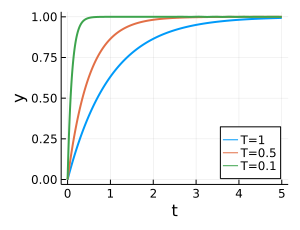

In [2]:
plt = plot()

K = 1
T = (1, 0.5, 0.1)

for i in 1:1:length(T)
    P = tf([0, K], [T[i], 1])
    y, t = step( P, 0:0.01:5 )
    plot!(plt, t, y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="T=$(T[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end

plot(plt)

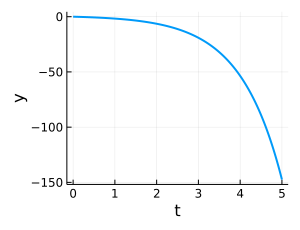

In [3]:
T, K = -1, 1
y, t = step(tf([0, K], [T, 1]), 0:0.01:5 )

plot(t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

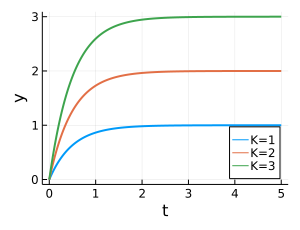

In [4]:
plt = plot()

T = 0.5
K = [1, 2, 3]

for i in 1:1:length(K)
    y, t = step( tf([0, K[i]], [T, 1]), 0:0.01:5) 
    plot!(plt, t, y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="K=$(K[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end

plot(plt)

### 2次遅れ系

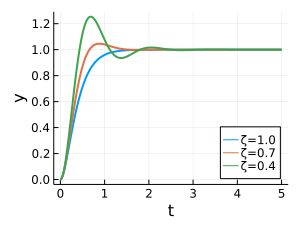

In [5]:
plt = plot()

ζ = [1, 0.7, 0.4]
ωₙ = 5

for i in 1:1:length(ζ)
    P = tf([0, ωₙ^2], [1, 2*ζ[i]*ωₙ, ωₙ^2])
    y, t = step(P, 0:0.01:5)
    
    plot!(plt, t, y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="ζ=$(ζ[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end

plot(plt)

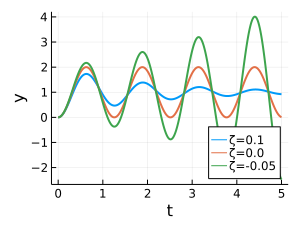

In [6]:
plt = plot()

ζ = [0.1, 0, -0.05]
ωₙ = 5

for i in 1:1:length(ζ)
    P = tf([0, ωₙ^2], [1, 2*ζ[i]*ωₙ, ωₙ^2])
    y, t = step(P, 0:0.01:5)
    
    plot!(plt, t, y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="ζ=$(ζ[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end

plot(plt)

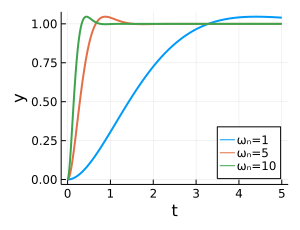

In [7]:
plt = plot()

ζ = 0.7
ωₙ = [1, 5, 10]

for i in 1:1:length(ωₙ)
    P = tf([0, ωₙ[i]^2], [1, 2*ζ*ωₙ[i], ωₙ[i]^2])
    y, t = step(P, 0:0.01:5)
    
    plot!(plt, t, y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="ωₙ=$(ωₙ[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ 
    )
end

plot(plt)

## 練習問題

TransferFunction{Continuous, ControlSystems.SisoRational{Int64}}
   s + 3
------------
s^2 + 3s + 2

Continuous-time transfer function model


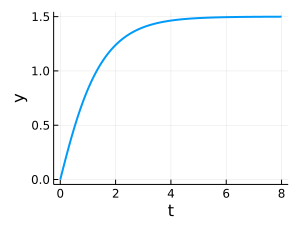

In [8]:
P1 = tf([1, 3], [1, 3, 2])
println(P1)

y, t = step(P1, 0:0.01:8 )
plot(t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

TransferFunction{Continuous, ControlSystems.SisoRational{Int64}}
         1
-------------------
s^3 + 2s^2 + 2s + 1

Continuous-time transfer function model


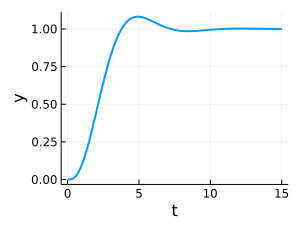

In [9]:
P2 = tf([0, 1], [1, 2, 2, 1])
println(P2)

y, t = step(P2, 0:0.01:15 )
plot(t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

## 状態空間モデルの時間応答

In [10]:
A = [0 1; -4 -5]
B = [0; 1]
C = [1 0; 0 1]
D = [0; 0]
P = ss(A, B, C, D)

StateSpace{Continuous, Int64}
A = 
  0   1
 -4  -5
B = 
 0
 1
C = 
 1  0
 0  1
D = 
 0
 0

Continuous-time state-space model

In [11]:
eigvals(A)

2-element Vector{Float64}:
 -4.0
 -1.0

### 零入力応答

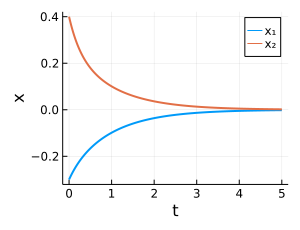

In [12]:
Td = 0:0.01:5
X0 = [-0.3, 0.4]
u(x,t) = 0 
_, t, x, _ = lsim(P, u, Td, x0=X0); #ゼロ入力応答

plot(t, x',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label=["x₁" "x₂"],
    legend=:best,
    size=(300,230)   #プロットのサイズ 
)

### 零状態応答

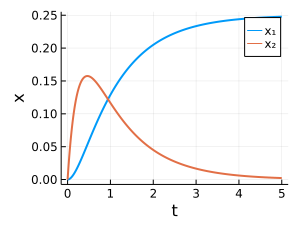

In [13]:
Td = 0:0.01:5
x, t = step(P, Td) #ゼロ状態応答

plot(t, x',
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label=["x₁" "x₂"],
    legend=:best,
    size=(300,230)   #プロットのサイズ 
)

### 完全応答

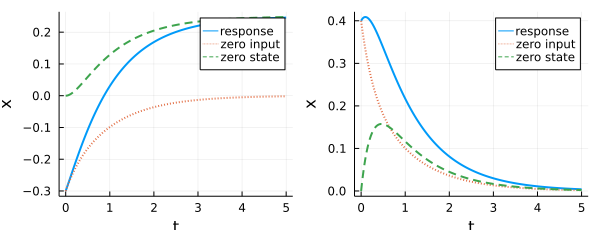

In [14]:
Td = 0:0.01:5
X0 = [-0.3, 0.4]
u(x,t) = 0
ustep(x,t) = 1

_, t, x, _ = lsim(P, ustep, Td, x0=X0); #完全応答
_, t, xin, _ = lsim(P, u, Td, x0=X0); #ゼロ入力応答
xst, t = step(P, Td) #ゼロ状態応答

p = [ plot(), plot()]

for i = 1:2
plot!(p[i], t, x[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="response",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xin[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:dot,        #線種
    label="zero input",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xst[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:dash,        #線種
    label="zero state",
    legend=:best,
    size=(300,230)   #プロットのサイズ 
)
end

plot( p[1], p[2], layout=(1,2), size=(600,230) )

### 練習問題

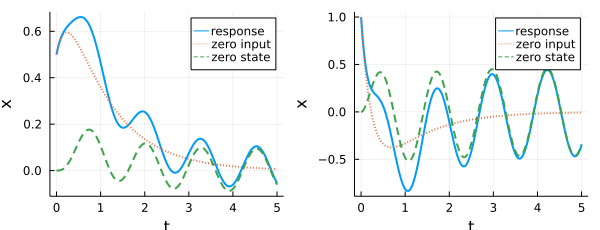

In [15]:
Td = 0:0.01:5
X0 = [0.5, 1]
u(x,t) = 0
ud(x,t) = 3sin(5t)

y, t, x, uout = lsim(P, ud, Td, x0=X0); #完全応答
y, t, xin, uout = lsim(P, u, Td, x0=X0); #ゼロ入力応答
y, t, xst, uout = lsim(P, ud, Td);  #ゼロ状態応答

p = [ plot(), plot()]

for i = 1:2
plot!(p[i], t, x[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="response",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xin[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:dot,        #線種
    label="zero input",
    size=(300,230)   #プロットのサイズ 
)
    
plot!(p[i], t, xst[i,:],
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:dash,        #線種
    label="zero state",
    legend=:best,
    size=(300,230)   #プロットのサイズ 
)
end

plot( p[1], p[2], layout=(1,2), size=(600,230) )

## 安定性

### 極

In [16]:
P1 = tf([0,1],[1, 1])
println("P1:", pole(P1))

P2 = tf([0,1],[-1, 1])
println("P2:", pole(P2))

P3 = tf([0,1],[1, 0.05, 1])
println("P3:", pole(P3))

P4 = tf([0,1],[1, -0.05, 1])
println("P4:", pole(P4))

P1:ComplexF64[-1.0 + 0.0im]
P2:ComplexF64[1.0 + 0.0im]
P3:ComplexF64[-0.025000000000000015 + 0.9996874511566101im, -0.025000000000000015 - 0.9996874511566101im]
P4:ComplexF64[0.025000000000000015 + 0.9996874511566101im, 0.025000000000000015 - 0.9996874511566101im]


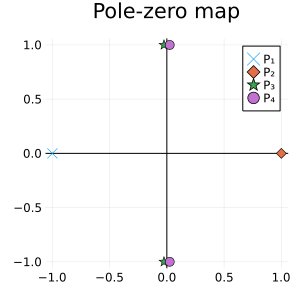

In [17]:
pzmap(P1, markersize=5, markerstrokewidth=10, marker=:xcross, markeralpha=1, label="P₁")
pzmap!(P2,markersize=5, marker=:diamond, markeralpha=1, label="P₂")
pzmap!(P3, markersize=5, marker=:star, markeralpha=1, label="P₃")
pzmap!(P4, markersize=5, marker=:circle, markeralpha=1, label="P₄")

plot!(size=(300,300), legend=:best)

### 位相面図

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

In [2]:
function vectorfield2d(field, points, t, v, arrowlength=0.02)
    # More input pattern parsing is solved by the Plots package, but I don't know how.
    errormessage = "Incorrect formatting of points. Please format them as [x1 y1; x2, y2;...]"
    
    if typeof(points) <: Array{<:Number, 2} && size(points)[1] === 2
        vectors = similar(points)
        for i in 1:size(points)[2]
            vectors[:, i] .= collect(field(points[:, i]...))
        end
    else
        error(errormessage)
    end
    vectors .*= arrowlength
    quiver(points[1, :],points[2, :],quiver=(vectors[1, :], vectors[2, :]))
    plot!(t, v[2,1]/v[1,1]*t)
    plot!(t, v[2,2]/v[1,2]*t)
    display(plot!(size=(300,300), xlim=(-1.5,1.5), ylim=(-1.5,1.5), legend=false))
end

function meshgrid(n)
    xs = ones(n) .* (1:n)'
    ys = xs'
    xys = permutedims(cat(xs, ys; dims = 3), [3, 1, 2])
    return reshape(xys, 2, n^2)
end

meshgrid (generic function with 1 method)

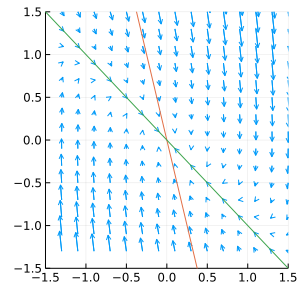

In [4]:
A = [0 1; -4 -5]
s,v = eigen(A)

vf(x, y) = (A[1,1]*x + A[1,2]*y,  A[2,1]*x + A[2,2]*y) # circular vectorfield

t = -1.5:0.01:1.5;
grid = meshgrid(20) ./5 .- [1.5; 1.5]
vectorfield2d(vf, grid, t, v)

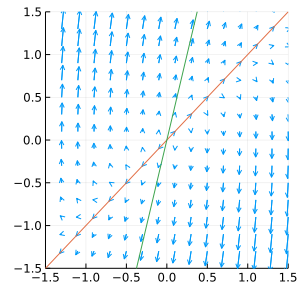

In [5]:
A = [0 1; -4 5]
s,v = eigen(A)

vf(x, y) = (A[1,1]*x + A[1,2]*y,  A[2,1]*x + A[2,2]*y) # circular vectorfield

t = -1.5:0.01:1.5;
grid = meshgrid(20) ./5 .- [1.5; 1.5]
vectorfield2d(vf, grid, t, v)

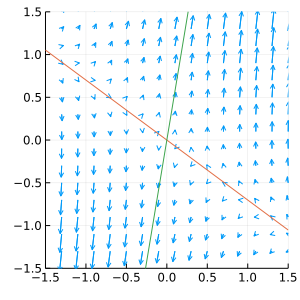

In [6]:
A = [0 1; 4 5]
s,v = eigen(A)

vf(x, y) = (A[1,1]*x + A[1,2]*y,  A[2,1]*x + A[2,2]*y) # circular vectorfield

t = -1.5:0.01:1.5;
grid = meshgrid(20) ./5 .- [1.5; 1.5]
vectorfield2d(vf, grid, t, v)

### 零点の影響

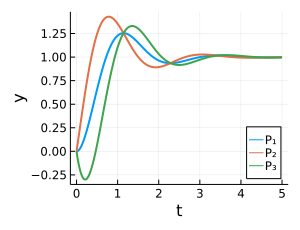

In [7]:
Td = 0:0.01:5
Ud(t, x) = 1

ζ = .4
ωₙ = 3

P1 = tf([ 0, ωₙ^2],[1, 2*ζ*ωₙ, ωₙ^2])
Pss = ss(P1)
y, t, x, uout = lsim(Pss, Ud, Td)

plot(t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="P₁",
    size=(300,230)   #プロットのサイズ 
)

P2 = tf([ 3, ωₙ^2],[1, 2*ζ*ωₙ, ωₙ^2])
Pss = ss(P2)
y, t, x, uout = lsim(Pss, Ud, Td)

plot!(t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="P₂",
    size=(300,230)   #プロットのサイズ 
)


P3 = tf([ -3, ωₙ^2],[1, 2*ζ*ωₙ, ωₙ^2])
Pss = ss(P3)
y, t, x, uout = lsim(Pss, Ud, Td)

plot!(t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="P₃",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ 
)

## 周波数応答

### インパルスは余弦波の重ね合わせ

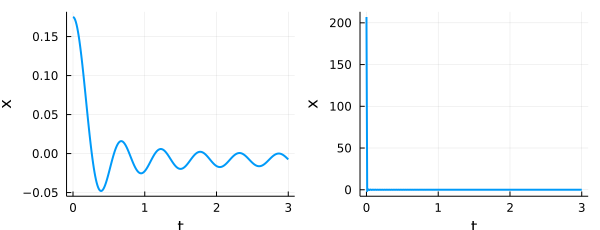

In [8]:
t = 0:0.01:3;

uimp = 0 * t
for i in range(0,10)
    uimp = uimp + (0.1/2π)*cos.(t * (i+1))
end

p1 = plot(t, uimp,
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

uimp = 0 * t
for i in range(0,13000)
    uimp = uimp + (0.1/2π)*cos.(t * (i+1))
end

p2 = plot(t, uimp,
    xlabel="t",   #X軸のラベル
    ylabel="x",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    legend=false,
    size=(300,230)   #プロットのサイズ 
)

plot(p1, p2, layout=(1,2), size=(600,230))

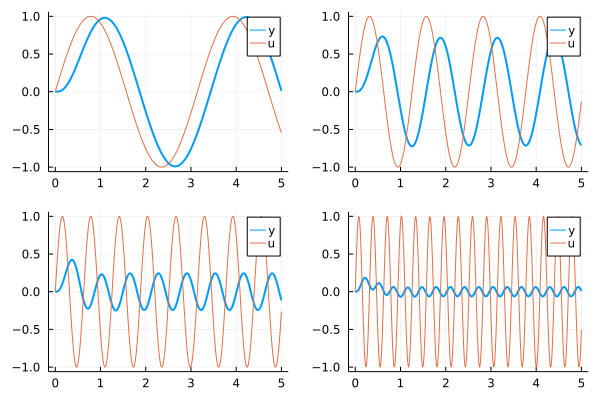

In [9]:
ζ = 0.7
ωₙ = 5
P = tf([0,ωₙ^2],[1, 2*ζ*ωₙ, ωₙ^2])

freq = [2, 5, 10, 20]
Td = 0:0.01:5

p = [ plot() plot(); plot() plot() ];

for i in [1,2]
    for j in [1,2]
        u(x,t) = sin(freq[2*(i-1)+j]*t)
        y, t, x, uout = lsim(P, u, Td)
   
        plot!(p[i,j], t, y', lw=2, label="y")
        plot!(p[i,j], t, uout', lw=1, label="u")
    end
end

plot(p[1,1],p[1,2],p[2,1],p[2,2], layout=(2,2))

### 1次遅れ系のボード線図

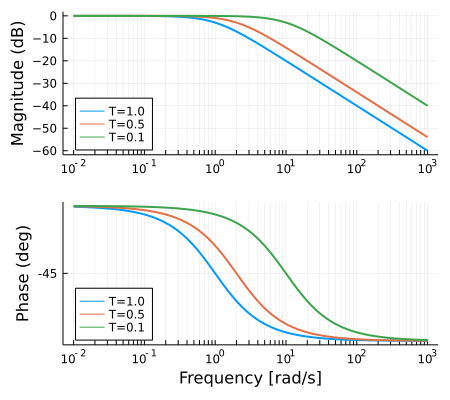

In [10]:
K = 1
T = [1, 0.5, 0.1]

P1 = tf([0, K],[T[1], 1])
P2 = tf([0, K],[T[2], 1])
P3 = tf([0, K],[T[3], 1])

setPlotScale("dB")
bodeplot([P1,P2,P3], lw=2, size=(450,400), 
    label = ["T=$(T[1])" "T=$(T[1])"  "T=$(T[2])" "T=$(T[2])"  "T=$(T[3])" "T=$(T[3])"], 
    legend=:bottomleft, title=""  )

### 2次遅れ系のボード線図

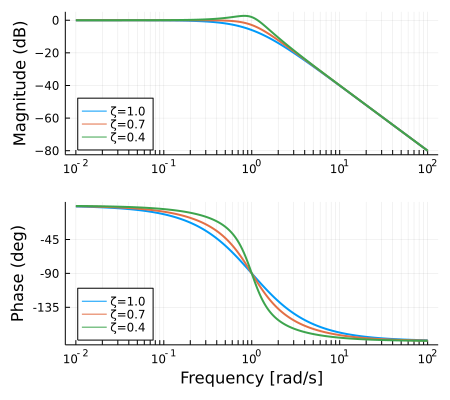

In [11]:
ζ = [1, 0.7, 0.4]
ωₙ = 1

P1 = tf([0, ωₙ^2], [1, 2*ζ[1]*ωₙ, ωₙ^2])
P2 = tf([0, ωₙ^2], [1, 2*ζ[2]*ωₙ, ωₙ^2])
P3 = tf([0, ωₙ^2], [1, 2*ζ[3]*ωₙ, ωₙ^2])

setPlotScale("dB")
bodeplot([P1,P2,P3], lw=2, size=(450,400),
    label = ["ζ=$(ζ[1])" "ζ=$(ζ[1])" "ζ=$(ζ[2])" "ζ=$(ζ[2])" "ζ=$(ζ[3])" "ζ=$(ζ[3])"], 
    legend=:bottomleft, title=""  )

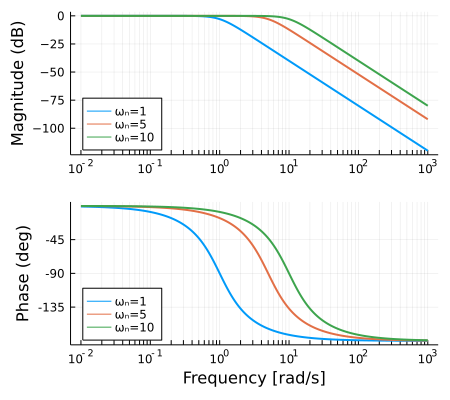

In [12]:
ζ = 0.7
ωₙ = (1, 5, 10)

P1 = tf([0, ωₙ[1]^2], [1, 2*ζ*ωₙ[1], ωₙ[1]^2])
P2 = tf([0, ωₙ[2]^2], [1, 2*ζ*ωₙ[2], ωₙ[2]^2])
P3 = tf([0, ωₙ[3]^2], [1, 2*ζ*ωₙ[3], ωₙ[3]^2])

setPlotScale("dB")
bodeplot([P1,P2,P3], lw=2, size=(450,400), 
    label = ["ωₙ=$(ωₙ[1])" "ωₙ=$(ωₙ[1])" "ωₙ=$(ωₙ[2])" "ωₙ=$(ωₙ[2])" "ωₙ=$(ωₙ[3])" "ωₙ=$(ωₙ[3])"], 
    legend=:bottomleft, title=""  )

### 練習問題

TransferFunction{Continuous, ControlSystems.SisoRational{Int64}}
   s + 3
------------
s^2 + 3s + 2

Continuous-time transfer function model


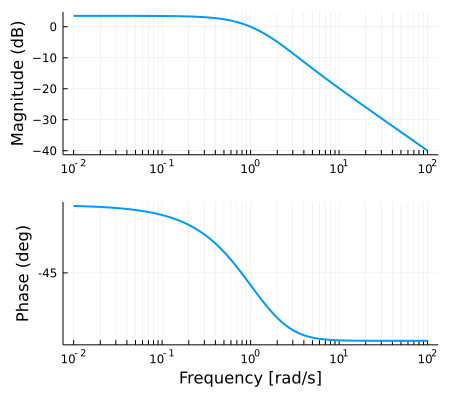

In [13]:
P1 = tf([1, 3], [1, 3, 2])
println(P1)

setPlotScale("dB")
bodeplot(P1, lw=2, size=(450,400), legend=false, title=""  )

TransferFunction{Continuous, ControlSystems.SisoRational{Int64}}
         1
-------------------
s^3 + 2s^2 + 2s + 1

Continuous-time transfer function model

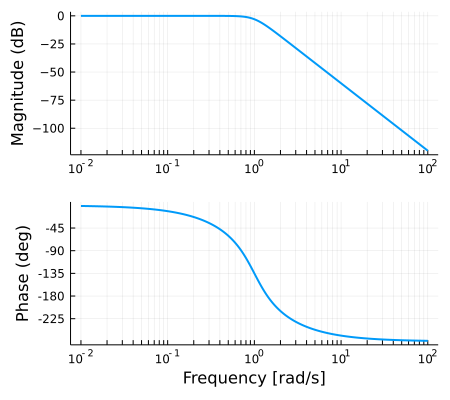

In [14]:
P2 = tf([0, 1], [1, 2, 2, 1])
print(P2)

setPlotScale("dB")
bodeplot(P2, lw=2, size=(450,400), legend=false, title="" )